# Exploratory Data Analysis of the Movie Lens 100k Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the ratings dataset

This table contains the ratings, for a given user_id, movie_id, with its corresponding timestamp

In [102]:
ratings = pd.read_csv('.surprise_data\\ml-100k\\ml-100k\\u.data', sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])
ratings['timestamp_converted'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.sort_values(by=['user_id', 'timestamp'], inplace=True)
ratings['seconds_since_previous_rating'] = ratings['timestamp'] - ratings.groupby(['user_id'])['timestamp'].shift(1)

ratings.head(2)

,user_id,item_id,rating,timestamp,timestamp_converted,seconds_since_previous_rating
59972,1,168,5,874965478,1997-09-22 21:57:58,NaN
92487,1,172,5,874965478,1997-09-22 21:57:58,0.0


In [104]:
ratings.describe()

# Ratings go from 1 to 5, user_id and item_id are both 1-indexed, too many zeros in seconds_since_previous_rating

,user_id,item_id,rating,timestamp,seconds_since_previous_rating
count,100000.00000,100000.000000,100000.000000,1.000000e+05,9.905700e+04
mean,462.48475,425.530130,3.529860,8.835289e+08,1.921129e+04
std,266.61442,330.798356,1.125674,5.343856e+06,2.886168e+05
min,1.00000,1.000000,1.000000,8.747247e+08,0.000000e+00
25%,254.00000,175.000000,3.000000,8.794487e+08,0.000000e+00
50%,447.00000,322.000000,4.000000,8.828269e+08,0.000000e+00
75%,682.00000,631.000000,4.000000,8.882600e+08,3.700000e+01
max,943.00000,1682.000000,5.000000,8.932866e+08,1.749021e+07


### Reading the items dataset

This table contains movie details such as title, release date, and category

In [105]:
items = pd.read_csv('.surprise_data\\ml-100k\\ml-100k\\u.item', sep='|', header=None, encoding='latin1',
            names=['item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
items['release_date_converted'] = pd.to_datetime(items['release_date'])
#Calculates the release year relative to 1998 - date of the dataset
items['release_year_rltv'] = 1998-items['release_date_converted'].dt.year 

items.head(2)

,item_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_date_converted,release_year_rltv
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1995-01-01,3.0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,3.0


### Reading the users details data

This table contains users details such as occupation, age and gender

In [106]:
users = pd.read_csv('.surprise_data\\ml-100k\\ml-100k\\u.user', sep='|', header=None, encoding='latin1',
            names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])
#First Digit of the US zip code represents the a region group            
users['zipcode_reduced'] = users['zip_code'].str[:1]

users.head(2)

,user_id,age,gender,occupation,zip_code,zipcode_reduced
0,1,24,M,technician,85711,8
1,2,53,F,other,94043,9


### Creating a dataframe with summarized info per user

In [7]:
ratings_by_user = ratings.groupby('user_id').agg(
    rating_count = ('rating', 'count'),
    min_seconds_since_previous_rating = ('seconds_since_previous_rating', 'min'),
    avg_seconds_since_previous_rating = ('seconds_since_previous_rating', 'mean'),
    avg_rating = ('rating', 'mean'), max_rating = ('rating', 'max'),min_rating = ('rating', 'min'))

# Age groups definition
users['age_group'] = pd.cut(users['age'], 
    bins=[0, 18, 25, 35, 45, 50, 56, 100], 
    labels=['0-18', '19-25', '26-35', '36-45', '46-50', '51-56', '57+'], right=False)

user_analysis_df = pd.merge(ratings_by_user, users, on='user_id', how='left')

user_analysis_df.sort_values(by=['rating_count'], ascending=False).head(5)

,user_id,rating_count,min_seconds_since_previous_rating,avg_seconds_since_previous_rating,avg_rating,max_rating,min_rating,age,gender,occupation,zip_code,zipcode_reduced,age_group
404,405,737,0.0,7.211957,1.834464,5,1,22,F,healthcare,10019,1,19-25
654,655,685,0.0,8154.331871,2.908029,5,1,50,F,healthcare,60657,6,51-56
12,13,636,0.0,17883.316535,3.097484,5,1,47,M,educator,29206,2,46-50
449,450,540,0.0,18416.269017,3.864815,5,1,35,F,educator,11758,1,36-45
275,276,518,0.0,34139.421663,3.465251,5,1,21,M,student,95064,9,19-25


In [41]:
user_analysis_df.describe()

,user_id,rating_count,min_seconds_since_previous_rating,avg_seconds_since_previous_rating,avg_rating,max_rating,min_rating,age
count,943.000000,943.000000,943.0,943.000000,943.000000,943.000000,943.000000,943.000000
mean,472.000000,106.044539,0.0,19746.164138,3.588191,4.983033,1.265111,34.051962
std,272.364951,100.931743,0.0,55569.885964,0.445233,0.137186,0.512811,12.192740
min,1.000000,20.000000,0.0,5.225806,1.491954,3.000000,1.000000,7.000000
25%,236.500000,33.000000,0.0,20.907741,3.323054,5.000000,1.000000,25.000000
50%,472.000000,65.000000,0.0,45.590909,3.620690,5.000000,1.000000,31.000000
75%,707.500000,148.000000,0.0,6817.921097,3.869565,5.000000,1.000000,43.000000
max,943.000000,737.000000,0.0,641301.909091,4.869565,5.000000,4.000000,73.000000


In [107]:
# Looking at the average rating by age group, nothing unusual
user_analysis_df.groupby('age_group')['avg_rating'].mean()

age_group
0-18     3.446003
19-25    3.575947
26-35    3.547800
36-45    3.613870
46-50    3.622866
51-56    3.723311
57+      3.635205
Name: avg_rating, dtype: float64

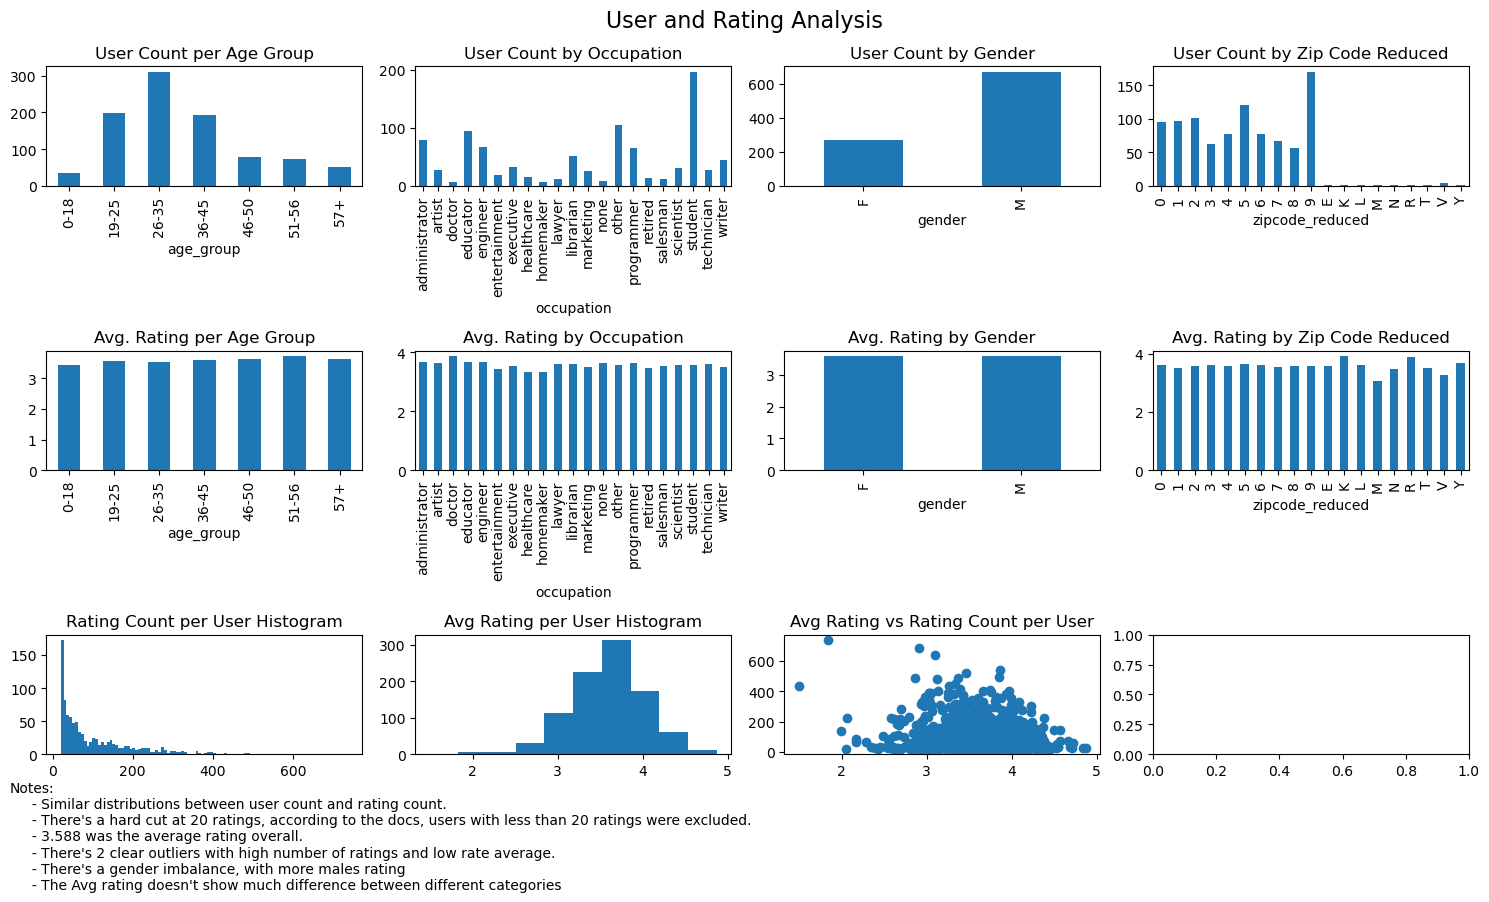

In [108]:
fig, axs = plt.subplots(3, 4, tight_layout=False, figsize=(15, 8))

fig.suptitle('User and Rating Analysis', fontsize=16)

# Bar Plots for user count

user_analysis_df.groupby('age_group')['user_id'].count().plot(kind='bar', ax=axs[0,0])
axs[0,0].set_title('User Count per Age Group')
user_analysis_df.groupby('occupation')['user_id'].count().plot(kind='bar', ax=axs[0,1])
axs[0,1].set_title('User Count by Occupation')
user_analysis_df.groupby('gender')['user_id'].count().plot(kind='bar', ax=axs[0,2])
axs[0,2].set_title('User Count by Gender')
user_analysis_df.groupby('zipcode_reduced')['user_id'].count().plot(kind='bar', ax=axs[0,3])
axs[0,3].set_title('User Count by Zip Code Reduced')

# Bar Plots for average user rating

user_analysis_df.groupby('age_group')['avg_rating'].mean().plot(kind='bar', ax=axs[1,0])
axs[1,0].set_title('Avg. Rating per Age Group')
user_analysis_df.groupby('occupation')['avg_rating'].mean().plot(kind='bar', ax=axs[1,1])
axs[1,1].set_title('Avg. Rating by Occupation')
user_analysis_df.groupby('gender')['avg_rating'].mean().plot(kind='bar', ax=axs[1,2])
axs[1,2].set_title('Avg. Rating by Gender')
user_analysis_df.groupby('zipcode_reduced')['avg_rating'].mean().plot(kind='bar', ax=axs[1,3])
axs[1,3].set_title('Avg. Rating by Zip Code Reduced')

# Histograms

axs[2,0].hist(user_analysis_df['rating_count'], bins=100)
axs[2,0].set_title('Rating Count per User Histogram')
axs[2,1].hist(user_analysis_df['avg_rating'])
axs[2,1].set_title('Avg Rating per User Histogram')

# Scatter plot

#scatter plot colored by gender
axs[2,2].scatter(user_analysis_df['avg_rating'], user_analysis_df['rating_count'])
axs[2,2].set_title('Avg Rating vs Rating Count per User')



plt.figtext(0.01, -0.12, "Notes:\n \
    - Similar distributions between user count and rating count.\n \
    - There's a hard cut at 20 ratings, according to the docs, users with less than 20 ratings were excluded.\n \
    - 3.588 was the average rating overall.\n \
    - There's 2 clear outliers with high number of ratings and low rate average.\n \
    - There's a gender imbalance, with more males rating\n \
    - The Avg rating doesn't show much difference between different categories" , ha="left", fontsize=10)

plt.show()

#### Analyzing the seconds since previous rating to see if there's a pattern

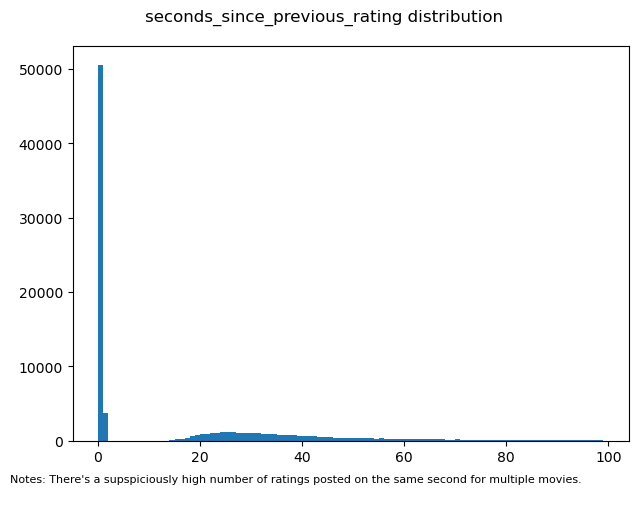

In [10]:
fig, axs = plt.subplots(1, 1, tight_layout=False) #, figsize=(12, 5))

fig.suptitle('seconds_since_previous_rating distribution')

# Define custom bins
bins = [i for i in range(0, 100)]

#plt.hist(data['values'], bins=custom_bins, edgecolor='black')
axs.hist(ratings['seconds_since_previous_rating'],  bins=bins)

plt.figtext(0.01, -0.03, "Notes: There's a supspiciously high number of ratings posted on the same second for multiple movies. \n", ha="left", fontsize=8)

plt.show()

There's a supspiciously high number of users with ratings posted on the same second for multiple movies, 
not sure how reliable is the timestamp column as I was hoping to use the difference to identify bots, but there could have been 
an automated data ingestion process at some point, below is just one example:

In [ ]:
ratings[ratings.user_id == 202].head(5)

,user_id,item_id,rating,timestamp,timestamp_converted,seconds_since_previous_rating
17640,202,286,1,879726342,1997-11-17 00:25:42,NaN
21311,202,258,4,879726342,1997-11-17 00:25:42,0.0
30356,202,242,3,879726342,1997-11-17 00:25:42,0.0
44483,202,269,4,879726420,1997-11-17 00:27:00,78.0
27459,202,481,1,879726642,1997-11-17 00:30:42,222.0


Around 85% of the ratings are posted within 60 seconds of each other.

In [ ]:
ratings[ratings.seconds_since_previous_rating < 60].count()

user_id                          84885
item_id                          84885
rating                           84885
timestamp                        84885
timestamp_converted              84885
seconds_since_previous_rating    84885
dtype: int64

### Creating a dataframe with summarized info per user

In [14]:
ratings_by_item = ratings.groupby('item_id').agg(
    rating_count = ('rating', 'count'),
    avg_rating = ('rating', 'mean'), max_rating = ('rating', 'max'),min_rating = ('rating', 'min'))

item_analysis_df = pd.merge(ratings_by_item, items, on='item_id', how='left')

# Top Movies by Rating Count
item_analysis_df.sort_values(by=['rating_count'], ascending=False).head(5)

,item_id,rating_count,avg_rating,max_rating,min_rating,movie_title,release_date,video_release_date,IMDb_URL,unknown,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_date_converted,release_year_rltv
49,50,583,4.358491,5,1,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,...,0,0,0,1,1,0,1,0,1977-01-01,21.0
257,258,509,3.803536,5,1,Contact (1997),11-Jul-1997,NaN,http://us.imdb.com/Title?Contact+(1997/I),0,...,0,0,0,0,1,0,0,0,1997-07-11,1.0
99,100,508,4.155512,5,1,Fargo (1996),14-Feb-1997,NaN,http://us.imdb.com/M/title-exact?Fargo%20(1996),0,...,0,0,0,0,0,1,0,0,1997-02-14,1.0
180,181,507,4.007890,5,1,Return of the Jedi (1983),14-Mar-1997,NaN,http://us.imdb.com/M/title-exact?Return%20of%2...,0,...,0,0,0,1,1,0,1,0,1997-03-14,1.0
293,294,485,3.156701,5,1,Liar Liar (1997),21-Mar-1997,NaN,http://us.imdb.com/Title?Liar+Liar+(1997),0,...,0,0,0,0,0,0,0,0,1997-03-21,1.0


There are movies with only 1 rating, which might make it hard for both the train test split and the model to learn from them

In [ ]:
item_analysis_df.describe()

,item_id,rating_count,avg_rating,max_rating,min_rating,video_release_date,unknown,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year_rltv
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1681.00000
mean,841.500000,59.453032,3.076045,4.451249,1.300832,NaN,0.001189,0.149227,0.080262,0.024970,...,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052,8.61392
std,485.695893,80.383846,0.781662,1.016960,0.712671,NaN,0.034473,0.356418,0.271779,0.156081,...,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714,14.25358
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,421.250000,6.000000,2.659600,4.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
50%,841.500000,27.000000,3.161528,5.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000
75%,1261.750000,80.000000,3.653428,5.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.00000
max,1682.000000,583.000000,5.000000,5.000000,5.000000,NaN,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,76.00000


Top Movies by Rating Average with at least 20 ratings

In [ ]:
item_analysis_df[item_analysis_df.rating_count>=20].sort_values(by=['avg_rating'], ascending=False)[['movie_title', 'release_date', 'rating_count', 'avg_rating']].head(10)

,movie_title,release_date,rating_count,avg_rating
407,"Close Shave, A (1995)",28-Apr-1996,112,4.491071
317,Schindler's List (1993),01-Jan-1993,298,4.466443
168,"Wrong Trousers, The (1993)",01-Jan-1993,118,4.466102
482,Casablanca (1942),01-Jan-1942,243,4.456790
113,Wallace & Gromit: The Best of Aardman Animatio...,05-Apr-1996,67,4.447761
63,"Shawshank Redemption, The (1994)",01-Jan-1994,283,4.445230
602,Rear Window (1954),01-Jan-1954,209,4.387560
11,"Usual Suspects, The (1995)",14-Aug-1995,267,4.385768
49,Star Wars (1977),01-Jan-1977,583,4.358491
177,12 Angry Men (1957),01-Jan-1957,125,4.344000


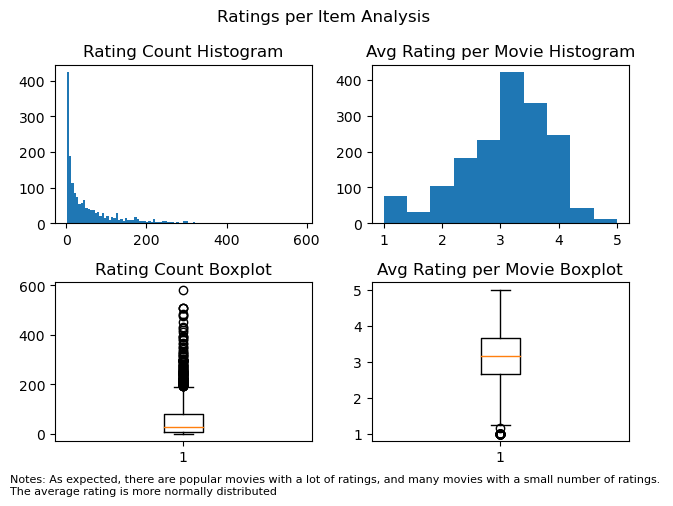

In [110]:
fig, axs = plt.subplots(2, 2, tight_layout=False) #, figsize=(12, 5))

fig.suptitle('Ratings per Item Analysis')

axs[0,0].hist(item_analysis_df['rating_count'], bins=100)
axs[0,0].set_title('Rating Count Histogram')
axs[0,1].hist(item_analysis_df['avg_rating'])
axs[0,1].set_title('Avg Rating per Movie Histogram')

axs[1,0].boxplot(item_analysis_df['rating_count'])
axs[1,0].set_title('Rating Count Boxplot')
axs[1,1].boxplot(item_analysis_df['avg_rating'])
axs[1,1].set_title('Avg Rating per Movie Boxplot')

plt.figtext(0.01, -0.03, "Notes: As expected, there are popular movies with a lot of ratings, and many movies with a small number of ratings. \nThe average rating is more normally distributed", ha="left", fontsize=8)

plt.show()